In [1]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=100, centers=4, cluster_std=0.60, random_state=0)

In [2]:
def normDist(x1, x2):
    #dist=np.sqrt(sum(np.power(x1 - x2, 2))) #36.406001444695193
    dist = np.linalg.norm(x1 - x2) #36.406001444695193
    return dist

## 3번째 라인의 clusterAssigned = np.zeros(shape=(row, k), dtype=float)를 k->2로 수정해 주었습니다.
## 저희가 넣는 데이터는 클러스터의 개수는 4개지만, 데이터의 형태는 row x 2이기 때문입니다.

In [3]:
def cluster(x, k, centroids):
    row, col = x.shape
    clusterAssigned = np.zeros(shape=(row, 2), dtype=float)
    # print (clusterAssigned)
    clusterUpdated=True
    iter = 1
    while(clusterUpdated):
        print ("\n\n====== Iteration {} ======".format(iter))
        # STEP 1: assign to closer cluster
        for i in range(row):
            minDist = np.inf   # set arbitray max to minDist
            minIndex = -1      # set arbitray index to minIndex
            # compute distance and assign to closer cluster
            for j in range(k):
                # distance from centroids[j] to x[0]
                distJI = normDist(centroids[j], x[i])
                # print ("Distance {:.3f} between {} and {}".format(distJI, centroids[j], x[i]))
                # pick the closest centroid
                if distJI < minDist:
                    minDist = distJI
                    minIndex = j
            clusterAssigned[i] = [minIndex, minDist]   #-----changed
        # STEP 2: update centroids
        _centroids=np.zeros(shape = (k, x.shape[1]), dtype=float)
        for cent in range(k):
            # read data by index and average them
            _centroids[cent] = np.mean(x[clusterAssigned[:,0]==cent],axis=0)
        # print ("Centroids updated: \n", _centroids)
        # STEP 3: see if centroids is updated. STOP if NOT updated
        comparison = np.equal(centroids, _centroids) # np.isclose() in case some tolerence is required
        if(comparison.all() == True):
            print ("\n.....NOT Updating Centroids\n {} => \n{}".format(centroids, _centroids))
            clusterUpdated = False
            return centroids, clusterAssigned
        else:
            print ("\n.....Updating Centroids\n {} => \n{}".format(centroids, _centroids))
            centroids = _centroids
            iter += 1

# 문제 1. 클러스터의 중심점을 몇 회만에 찾는지, 매 반복 중심값만을 출력한다.

In [4]:
import numpy as np
ind = np.random.choice(len(X),4)
centroids = X[ind,:]
centroids, clusterAssigned = cluster(X,4,centroids)



====== Iteration 1 ======

.....Updating Centroids
 [[-0.40636864  3.46150906]
 [-1.12352716  3.16235936]
 [-1.15845639  3.47120626]
 [ 1.5108885   0.9288309 ]] => 
[[ 0.53840563  4.88597535]
 [-1.49596635  2.62892519]
 [-1.57315207  6.19951877]
 [ 1.99299447  1.07350657]]


====== Iteration 2 ======

.....Updating Centroids
 [[ 0.53840563  4.88597535]
 [-1.49596635  2.62892519]
 [-1.57315207  6.19951877]
 [ 1.99299447  1.07350657]] => 
[[ 0.83044547  4.27831711]
 [-1.5772186   3.11456071]
 [-1.27208964  7.74944718]
 [ 1.97918933  0.97920012]]


====== Iteration 3 ======

.....NOT Updating Centroids
 [[ 0.83044547  4.27831711]
 [-1.5772186   3.11456071]
 [-1.27208964  7.74944718]
 [ 1.97918933  0.97920012]] => 
[[ 0.83044547  4.27831711]
 [-1.5772186   3.11456071]
 [-1.27208964  7.74944718]
 [ 1.97918933  0.97920012]]


## 3회만에 중심값을 찾는 모습을 볼 수 있었습니다.

In [5]:
def draw(x, centroids):
    import matplotlib.pyplot as plt
    #plt.subplot(5,2,iter)
    plt.scatter(x[:,0], x[:,1], color='blue')
    plt.scatter(centroids[:,0], centroids[:,1], color='red')

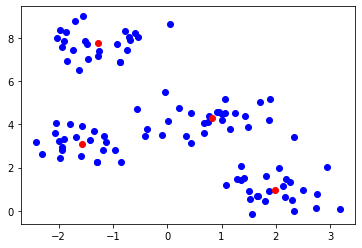

In [6]:
draw(X, centroids)

# 문제 2. 배정된 클러스터가 맞는지 비교하여 동일한지 확인하세요.

In [7]:
def draw2(x,y):
    import matplotlib.pyplot as plt
    #plt.subplot(5,2,iter)
    color = {0:'blue',1:'red',2:'green',3:'black'}
    
    for i in color.keys():
        ix = np.where(y==i)
        plt.scatter(x[ix,0], x[ix,1], color=color[i])

## 원본 데이터의 라벨별 색을 주어서 출력했습니다.

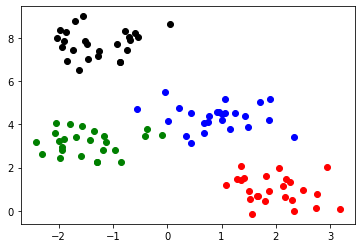

In [8]:
draw2(X, y)

## k-means를 통해 얻은 라벨별 색상을 입혀 출력을 한 결과 입니다.
## 색상이 다른 이유는 k-means자체가 어떤 라벨로 분류될지 모르기 때문입니다.(즉 라벨 1,2,3,4 에 큰 의미가 없다)

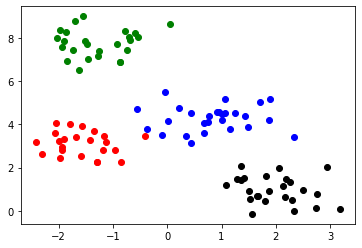

In [9]:
draw2(X, clusterAssigned[:,0])

## 가운데 파란색 label좌측 2개의 데이터를 제외하고는 잘 분류된 모습을 보여주었습니다!